In [2]:
import copy
import torch
import json


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys
sys.path.append(r"F:\EVO\evoxbench")
# sys.path.append(r"F:\EVO\evoxbench\evoxbench\database")
sys.path.append(r"F:\EVO\database")
sys.path.append(r"F:\EVO\data")
sys.path.append(r"F:\EVO\nasbench")
sys.path.append(r"F:\EVO\evoxbench\evoxbench\database\ORM")
# print(sys.path)

print('Configurating EvoXBench...')
from evoxbench.database.init import config
# config("F:\EVO\evoxbench\evoxbench\database", "F:\EVO\data\data")
config("F:\EVO\database\database", "F:\EVO\data\data")


from evoxbench.benchmarks import MoSegNASSearchSpace, MoSegNASEvaluator, MoSegNASBenchmark, MoSegNASSurrogateModel


Configurating EvoXBench...
Auto Configuration Succeed!, Using database F:\EVO\database\database.
Configuration Succeed!
Auto Configuration Succeed!, Using database F:\EVO\database\database.


### 可视化

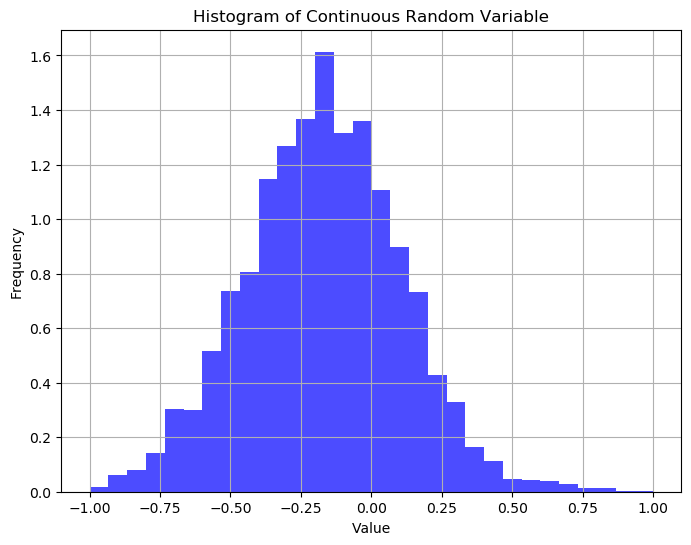

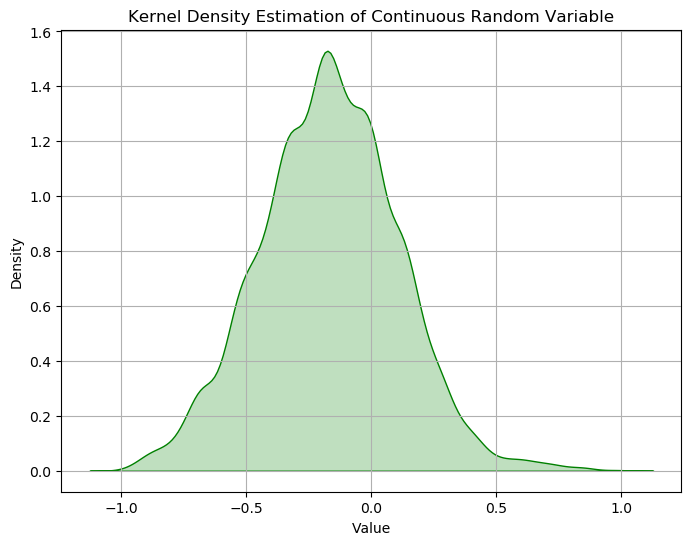

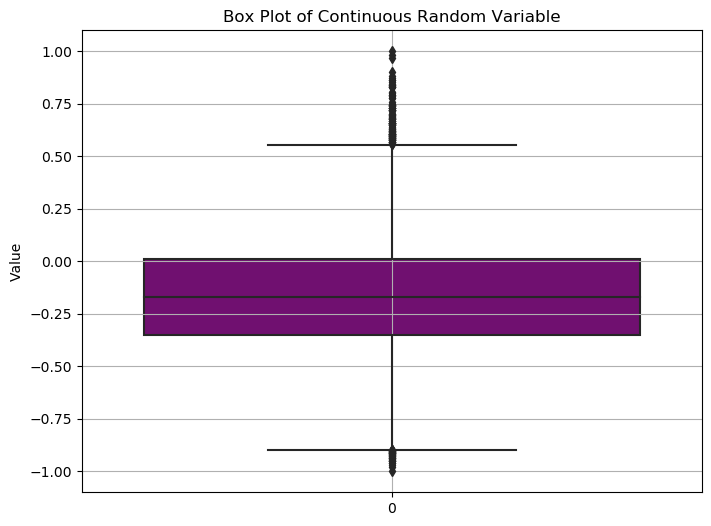

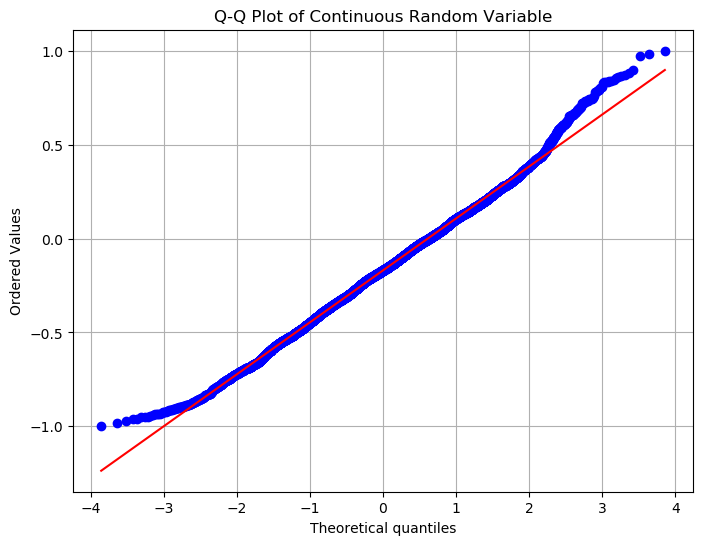

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
sys.path.append('F:\\EVO')
from seg_nas_codes.search.search_space import BasicSearchSpace
from scipy import stats

# define the search space
search_space = BasicSearchSpace()


meta_data = json.load(open("f:/EVO/seg_nas_codes/data/ofa_fanet_plus_bottleneck_rtx_fps@0.5.json", "r"))
subnet_str = [d['config'] for d in meta_data]
features = search_space.features(search_space.encode(subnet_str))
data = np.array([d['latency'] for d in meta_data])
data = np.log(data)
min_value = np.min(data)
max_value = np.max(data)
min_range = -1
max_range = 1

# 进行 Min-Max 归一化
data = (data - min_value) / (max_value - min_value) * (max_range - min_range) + min_range

# 绘制直方图
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Histogram of Continuous Random Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 绘制核密度估计图
plt.figure(figsize=(8, 6))
sns.kdeplot(data, shade=True, color='green')
plt.title('Kernel Density Estimation of Continuous Random Variable')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# 绘制箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, color='purple')
plt.title('Box Plot of Continuous Random Variable')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# 绘制Q-Q图
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Continuous Random Variable')
plt.grid(True)
plt.show()


### Real Subset in .json file

In [3]:
randomSubnet = [{
            "d": [
                0,
                0,
                0,
                0,
                1
            ],
            "e": [
                0.2,
                0.2,
                0.2,
                0.2,
                0.35,
                0.25,
                0.25,
                0.2,
                0.35,
                0.2,
                0.2,
                0.2,
                0.25
            ],
            "w": [
                1,
                0,
                0,
                1,
                2,
                2
            ]
        }]


In [ ]:
from evoxbench.benchmarks import NASBench101Benchmark, NASBench101Evaluator
objs = 'err&params'
benchmark = NASBench101Benchmark(objs=objs, normalized_objectives=False)
evaluator =  NASBench101Evaluator()
print("Benchmaking on NB101 search space with objectives: {}".format(objs))


N = 10
archs = benchmark.search_space.sample(N)
print('Randomly create {} architectures:'.format(N))
print(archs)

# encode architecture (phenotype) to decision variables (genotypes)
X = benchmark.search_space.encode(archs)
print('Encode architectures to decision variables X: ')
print(X)

decoded_X = benchmark.search_space.decode(X)
results = evaluator.evaluate(archs=decoded_X,true_eval=True)
print(results)

In [4]:
searchSpace = MoSegNASSearchSpace(subnet_str=True)
surrogateModel = MoSegNASSurrogateModel(latency_pretrained='F:\\EVO\\data\\moseg\\pretrained\\surrogate_model\\ranknet_latency.json',
mIoU_pretrained='F:\\EVO\\data\\moseg\\pretrained\\surrogate_model\\ranknet_mIoU.json',                                   
pretrained_json = 'F:\EVO\data\moseg\ofa_fanet_plus_bottleneck_rtx_fps@0.5.json')
# randomSubnet = searchSpace.sample(n_samples=1)
params = surrogateModel.params_predictor(subnet=randomSubnet)

TypeError: __init__() missing 2 required positional arguments: 'latency_pretrained' and 'mIoU_pretrained'

### **.pth** to **.json**

In [3]:
model = torch.load('F:\\EVO\\ranknet_latency.pth')
for layer, line in enumerate(model):
    print(f"Layer: {layer + 1}")
    for line, (key, value) in enumerate(line.items()):
        print(f"Line: {line + 1}, Parameter: {key}, Value: {value.size()}")

new_state_dict = {}
w_i, b_i = 1, 1
for line in model:
    for key, values in line.items():
        if 'weight' in key:
            new_state_dict['W{}'.format(w_i)] = copy.deepcopy(values.cpu().detach().numpy().tolist())
            w_i += 1
        if 'bias' in key:
            new_state_dict['b{}'.format(b_i)] = copy.deepcopy(values.cpu().detach().numpy().tolist())
            b_i += 1

# for key, values in new_state_dict.items():
#     print(key)
#     print(values)

with open('F:\\EVO\\ranknet_latency.json', 'w') as fp:
# with open('F:\\EVO\\data\\moseg\\pretrained\\surrogate_model\\ranknet_mIoU.json', 'w') as fp:
    json.dump(new_state_dict, fp)
fp.close()

Layer: 1
Line: 1, Parameter: stem.0.weight, Value: torch.Size([400, 75])
Line: 2, Parameter: stem.0.bias, Value: torch.Size([400])
Line: 3, Parameter: hidden.0.weight, Value: torch.Size([400, 400])
Line: 4, Parameter: hidden.0.bias, Value: torch.Size([400])
Line: 5, Parameter: hidden.2.weight, Value: torch.Size([400, 400])
Line: 6, Parameter: hidden.2.bias, Value: torch.Size([400])
Line: 7, Parameter: regressor.weight, Value: torch.Size([1, 400])
Line: 8, Parameter: regressor.bias, Value: torch.Size([1])
Layer: 2
Line: 1, Parameter: stem.0.weight, Value: torch.Size([400, 75])
Line: 2, Parameter: stem.0.bias, Value: torch.Size([400])
Line: 3, Parameter: hidden.0.weight, Value: torch.Size([400, 400])
Line: 4, Parameter: hidden.0.bias, Value: torch.Size([400])
Line: 5, Parameter: hidden.2.weight, Value: torch.Size([400, 400])
Line: 6, Parameter: hidden.2.bias, Value: torch.Size([400])
Line: 7, Parameter: regressor.weight, Value: torch.Size([1, 400])
Line: 8, Parameter: regressor.bias, Val


Line: 3, Parameter: hidden.0.weight, Value: torch.Size([400, 400])
Line: 4, Parameter: hidden.0.bias, Value: torch.Size([400])
Line: 5, Parameter: hidden.2.weight, Value: torch.Size([400, 400])
Line: 6, Parameter: hidden.2.bias, Value: torch.Size([400])
Line: 7, Parameter: regressor.weight, Value: torch.Size([1, 400])
Line: 8, Parameter: regressor.bias, Value: torch.Size([1])
Layer: 7
Line: 1, Parameter: stem.0.weight, Value: torch.Size([400, 75])
Line: 2, Parameter: stem.0.bias, Value: torch.Size([400])
Line: 3, Parameter: hidden.0.weight, Value: torch.Size([400, 400])
Line: 4, Parameter: hidden.0.bias, Value: torch.Size([400])
Line: 5, Parameter: hidden.2.weight, Value: torch.Size([400, 400])
Line: 6, Parameter: hidden.2.bias, Value: torch.Size([400])
Line: 7, Parameter: regressor.weight, Value: torch.Size([1, 400])
Line: 8, Parameter: regressor.bias, Value: torch.Size([1])
Layer: 8
Line: 1, Parameter: stem.0.weight, Value: torch.Size([400, 75])
Line: 2, Parameter: stem.0.bias, Valu

In [ ]:
import copy
import torch
import json

### Test

In [ ]:
pretrained = json.load(open('F:\\EVO\\data\\moseg\\pretrained\\surrogate_model\\ranknet_latency.json', 'r'))
print(pretrained)

In [ ]:
surrogateModel = MoSegNASSurrogateModel(pretrained='F:\\EVO\\data\\moseg\\pretrained\\surrogate_model\\ranknet_latency.json')
surrogateModel